In [1]:
import swarms
import pread as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    plt.style.use('paper')
except:
    pass

In [2]:
def Finc(T_s, apl, R_s, R_pl):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = (sig * T_s**4) / (pi * R_pl**2)
    return part1 * (R_s/a_pl)**2

In [3]:
def Fstar(Ls, Bnu, Ts, dpl):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = Ls * Bnu
    part2 = 4 * sig * Ts ** 4 * dpl ** 2
    return part1 / part2

In [4]:
def Fplt(B_nu_plt, R_plt, d_plt):
    return B_nu_plt * pi * R_plt ** 2 / d_plt ** 2

In [5]:
def Fscat(F_star, R_plt, g, Q, d_pl):
    return F_star * R_plt**2 * g * Q / (d_pl**2)

In [6]:
"""Access times with data.ages in years
          radii with data.radii in meters
          luminosity with data.lumin in watts
First entry is the root directory.
Second entry is the subdirectory.
Third entry is the filename.
"""
data = pd.Pread('data', 'Z002', 'pltlum_M1590Z002.csv') 

In [7]:
def lum_to_temp(L, R):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = L / (4 * pi * sig * R**2)
    return (part1)**(1./4.)

In [8]:
def lum_to_temp2(R, a, T_s):
    part1 = (R / a)**0.5
    return (part1 / 2**0.5)*T_s

In [9]:
def waverange_plt(M_pl, R_pl, a_pl, time, waverange = logspace(-7, -3, 200), lamb = 1.65e-6, d_pl = 10 * 3.086e16):
    R_s = 1 * 6.955e08
    M_s = 1 * 1.989e30
    L_s = 1 * 3.828e26
    
    M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 150000.;
    eta = 0.4; Nstr = 6.

    s = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl)
    
    T_star = s.stellarTemp()
    B_nu = s.computeBmu(waverange, T_star)
    F_inc = Fstar(L_s, B_nu, T_star, a_pl)
    F_star = Fstar(L_s, B_nu, T_star, d_pl)
    F_plt = []
    F_scat = []
    
    for i in range(len(waverange)):
        index = data.find_time_index(time)
        if (index > -1):
            T_plt = lum_to_temp(data.lumin[index], data.radii[index])
            B_nu_plt = s.computeBmu(waverange[i], T_plt)
            F_plt.append(Fstar(data.lumin[index], B_nu_plt, T_plt, d_pl)/1.e-26)
            F_scat.append(Fscat(F_inc[i], R_pl, 0.32, 0.5, d_pl)/1.e-26)
        
    return F_plt, F_scat, F_star

NameError: name 'logspace' is not defined

In [ ]:
def waverange_plt(planet, star, time, waverange = logspace(-7, -3, 200), lamb = 1.65e-6, d_pl = 10 * 3.086e16):
    
    M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 150000.;
    eta = 0.4; Nstr = 6.

    s = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl)
    
    T_star = s.stellarTemp()
    B_nu = s.computeBmu(waverange, T_star)
    F_inc = Fstar(L_s, B_nu, T_star, a_pl)
    F_star = Fstar(L_s, B_nu, T_star, d_pl)
    F_plt = []
    F_scat = []
    
    for i in range(len(waverange)):
        index = data.find_time_index(time)
        if (index > -1):
            T_plt = lum_to_temp(data.lumin[index], data.radii[index])
            B_nu_plt = s.computeBmu(waverange[i], T_plt)
            F_plt.append(Fstar(data.lumin[index], B_nu_plt, T_plt, d_pl)/1.e-26)
            F_scat.append(Fscat(F_inc[i], R_pl, 0.32, 0.5, d_pl)/1.e-26)
        
    return F_plt, F_scat, F_star

In [20]:
Lsun = 3.828e26 # all units in SI
Msun = 1.989e30 
Rsun = 6.955e8
Tsun = 5800
pc = 3.086e16
AU = 1.496e11
Mearth = 5.972e24
Rearth = 6.4e6
Rjup = 7.e7
Mjup = 318 * Mearth
Jansky = 1.e-26

star = swarms.Star(L=Lsun, M=Msun, T=Tsun, R=Rsun, d=10*pc)
earth = swarms.Planet(star, M=Mearth, R=Rearth, a=1*AU, Q=0.3)    
supjup = swarms.Planet(star, M=2*Mjup, R=Rjup, a=1*AU, Q=0.5)     
    
time = 3.e7 # years
lambdas = np.logspace(-7, -3, 200)

Fstar = star.F(lambdas, star.d)

g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

Fscatearth = earth.Fscat(lambdas, g)

a_pl = 1 * 1.496e11 # 1 AU
time = 3.e7 # yearsMearth = 5.972e24
Mearth = 5.972e24 # kg
Rearth = 6.4e6 # m
Msupjup = 636 * Mearth; Rsupjup = 7.e7 # m
waverange = logspace(-7, -3, 200)

flux_plt, scat_plt, F_star = waverange_plt(Mearth, Rearth, a_pl, time, waverange)
flux_supjup, scat_supjup, F_star = waverange_plt(Msupjup, Rsupjup, a_pl, time, waverange)

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


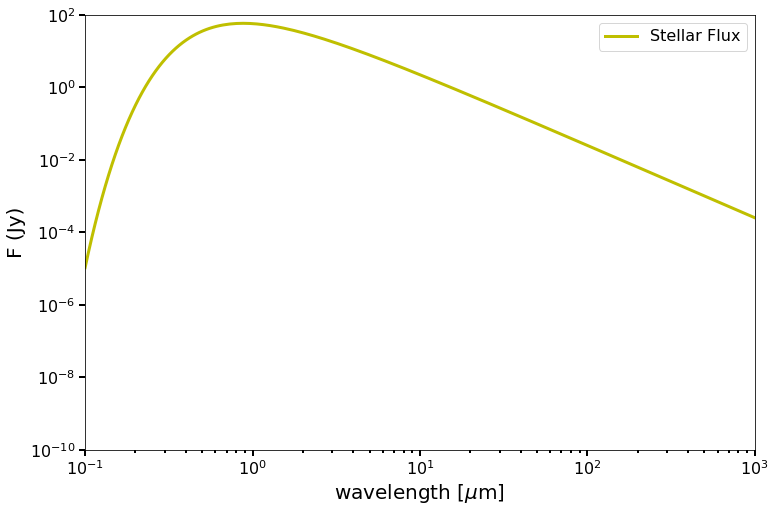

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, Fstar/1.e-26, 'y', label="Stellar Flux")

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


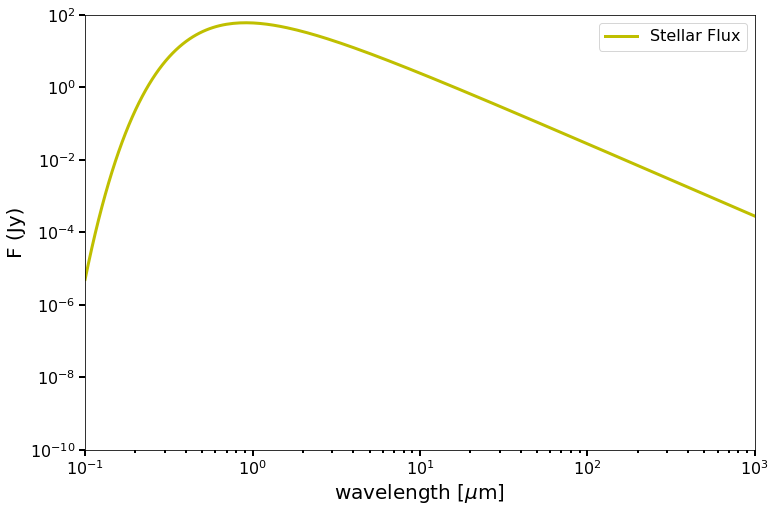

In [17]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
#ax.loglog(waverange*1e6, flux_plt, 'r', alpha=a, label="Planet thermal flux")
#ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
#ax.vlines(1.65, 1.e-10, 1e2, lw=1, color='k')
#ax.annotate(s='', xy=(0.8,2.e-8), xytext=(0.8,5.e1), arrowprops=dict(arrowstyle='<->', lw=3))
#ax.text(1.05, 1.e-4, r'$10^{10}$', fontsize=24)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


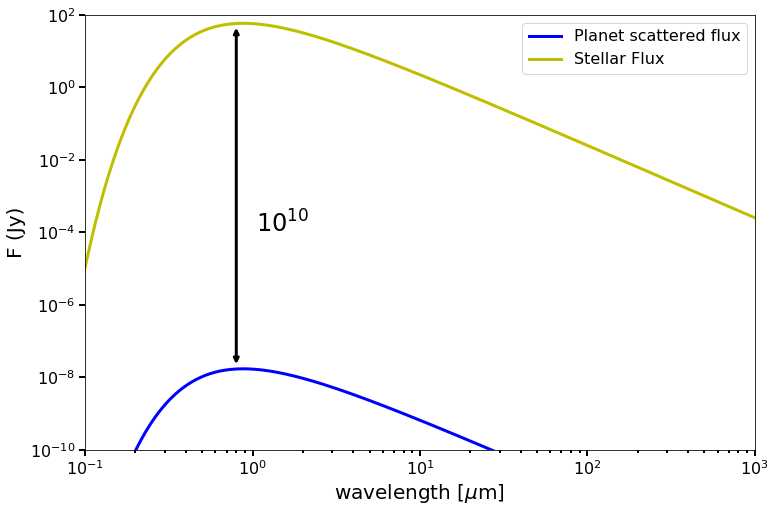

In [19]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, Fscatearth/1.e-26, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, Fstar/1.e-26, 'y', label="Stellar Flux")
ax.annotate(s='', xy=(0.8,2.e-8), xytext=(0.8,5.e1), arrowprops=dict(arrowstyle='<->', lw=3))
ax.text(1.05, 1.e-4, r'$10^{10}$', fontsize=24)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


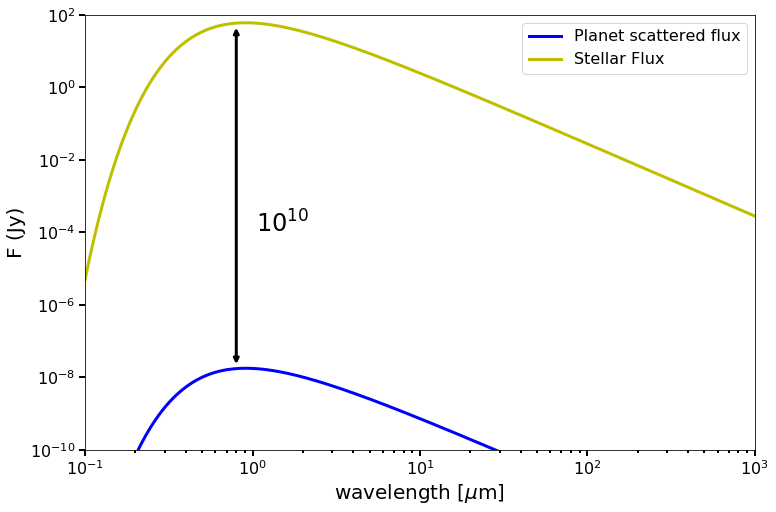

In [18]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
#ax.loglog(waverange*1e6, flux_plt, 'r', alpha=a, label="Planet thermal flux")
ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
#ax.vlines(1.65, 1.e-10, 1e2, lw=1, color='k')
ax.annotate(s='', xy=(0.8,2.e-8), xytext=(0.8,5.e1), arrowprops=dict(arrowstyle='<->', lw=3))
ax.text(1.05, 1.e-4, r'$10^{10}$', fontsize=24)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


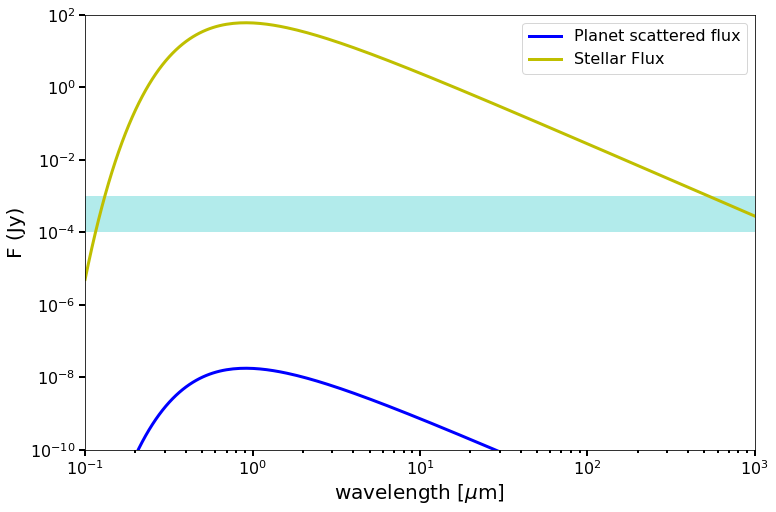

In [19]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
ax.fill_between(waverange*1e6, 1.e-4, 1.e-3, facecolor='c', alpha=0.3)
ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


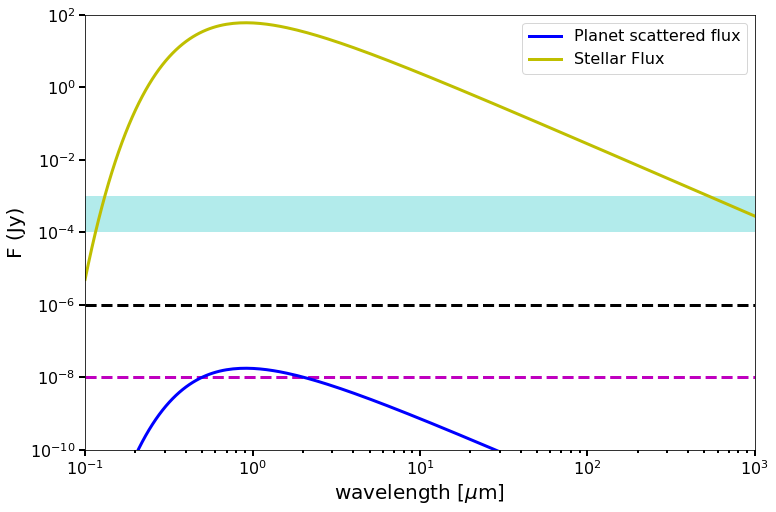

In [20]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
ax.fill_between(waverange*1e6, 1.e-4, 1.e-3, facecolor='c', alpha=0.3)
ax.hlines(1.e-6, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.hlines(1.e-8, 1.e-1, 1e3, lw=3, linestyle='--', color='m')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


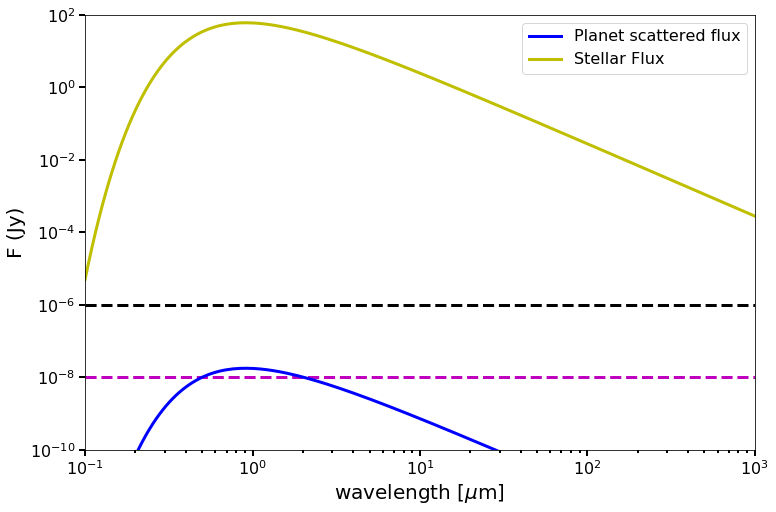

In [21]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
#ax.fill_between(waverange*1e6, 1.e-4, 1.e-3, facecolor='c', alpha=0.3)
ax.hlines(1.e-6, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.hlines(1.e-8, 1.e-1, 1e3, lw=3, linestyle='--', color='m')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


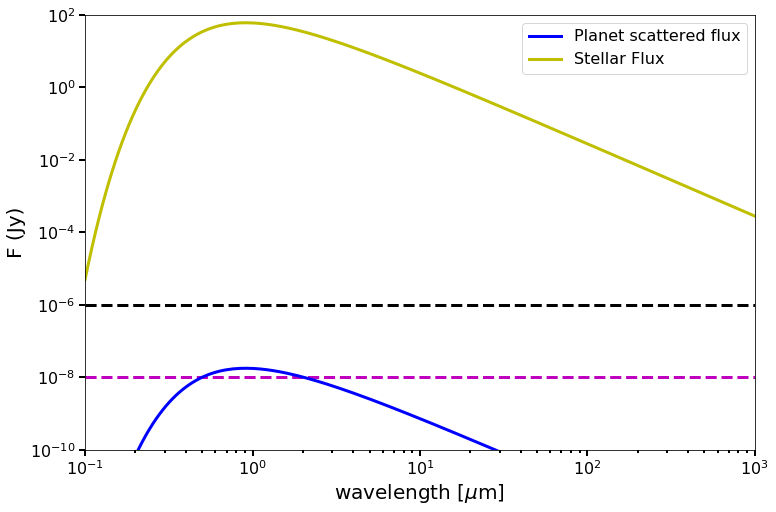

In [21]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, scat_supjup, 'k', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
#ax.fill_between(waverange*1e6, 1.e-4, 1.e-3, facecolor='c', alpha=0.3)
ax.hlines(1.e-6, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.hlines(1.e-8, 1.e-1, 1e3, lw=3, linestyle='--', color='m')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


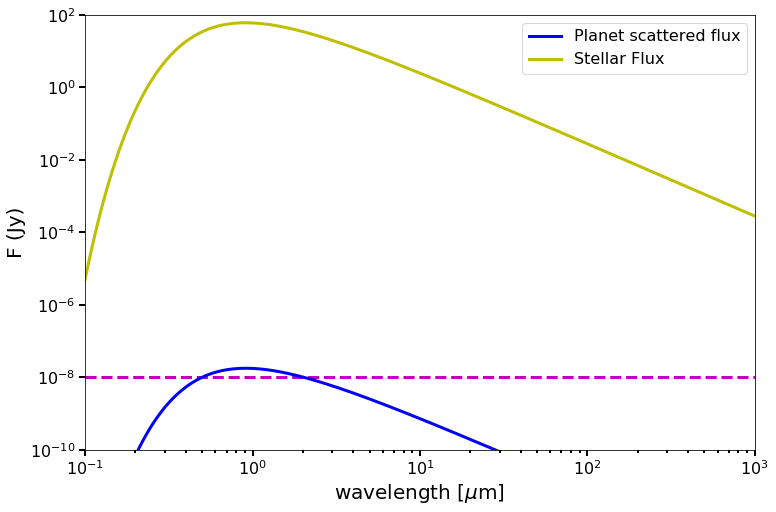

In [22]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(12,8))
a = 1.0
ax.loglog(waverange*1e6, scat_plt, 'b', alpha=a, label="Planet scattered flux")
ax.loglog(waverange*1e6, F_star/1.e-26, 'y', alpha=a, label="Stellar Flux")
#ax.fill_between(waverange*1e6, 1.e-4, 1.e-3, facecolor='c', alpha=0.3)
#ax.hlines(1.e-6, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.hlines(1.e-8, 1.e-1, 1e3, lw=3, linestyle='--', color='m')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()